In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from jupyter_core.migrate import regex

In [2]:
dataset = pd.read_pickle('../data/cleaning_final_dataset_from_scrape_22022025.pkl')

In [3]:
dataset.columns

Index(['lat', 'lon', 'uuid', 'is_new', 'label', 'model_stub', 'thumbs', 'id',
       'price_debatable', 'user_id',
       ...
       'vehicle_width', 'body_type', 'vehicle_length', 'top_speed', 'trim',
       'wheelbase', 'fuel_consumption', 'drive_type', 'doors', 'is_metallic'],
      dtype='object', length=141)

In [4]:
dataset[dataset.model.astype(str).str.lower().str.contains('c3')].head()

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,vehicle_width,body_type,vehicle_length,top_speed,trim,wheelbase,fuel_consumption,drive_type,doors,is_metallic
35,39.197300,26.284617,5dee99f6-186e-4ef2-89a4-22e3035abf77,False,NaN,Volvo C30 '09 1.6 SUMMUM,"{'count': 7, 'urls': ['https://static.car.gr/8...",817563,True,1001126,...,1447.0,hatchback,4266.0,185.0,1.6 Summum,2640.0,7.0,FWD,3.0,False
808,37.035601,22.085634,2ef3537f-4e3c-4213-85c0-92e4575e5aab,False,NaN,Citroen C3 Pluriel '04,"{'count': 7, 'urls': ['https://static.car.gr/9...",9134341,True,1001601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,False
1171,37.619366,22.759940,bf759f1e-4341-4484-9a90-e5366c581a4f,False,NaN,Citroen C3 Picasso '09 1.6 110hp Turbo Diesel,"{'count': 21, 'urls': ['https://static.car.gr/...",11822613,True,1006024,...,1631.0,van,4078.0,183.0,HDi 110 FAP Tendance,2540.0,4.9,FWD,5.0,True
1538,40.666019,22.908402,bd73bc23-1672-4016-b4a2-96ed583f57c2,False,NaN,Citroen C3 '10 1.100 CC,"{'count': 13, 'urls': ['https://static.car.gr/...",16546394,True,1010902,...,1510.0,hatchback,3860.0,153.0,1.1 First Tonic,2460.0,6.0,FWD,5.0,True
1610,39.197300,26.284617,5579b96c-9abe-41e3-913c-46ca43527ace,False,NaN,Citroen C3 Picasso '10 1.4 5D,"{'count': 7, 'urls': ['https://static.car.gr/1...",18386932,True,1001126,...,1631.0,van,4078.0,178.0,VTi 95 Advance,2540.0,6.9,FWD,5.0,True


In [15]:
dataset.loc[(dataset.brand=='citroen')&(dataset.model.astype(str).str.lower().str.contains('c3'))&(dataset.registration_year==2018)&(dataset.fuel_type=='petrol')&(dataset.mileage<60000)&(dataset.engine_size<1300)&(dataset.engine_size>1199),'raw_price'].describe()

count       26.000000
mean     11969.538462
std       4081.115173
min        295.000000
25%      10850.000000
50%      12300.000000
75%      13762.500000
max      17600.000000
Name: raw_price, dtype: float64

In [4]:
dataset.shape

(112944, 141)

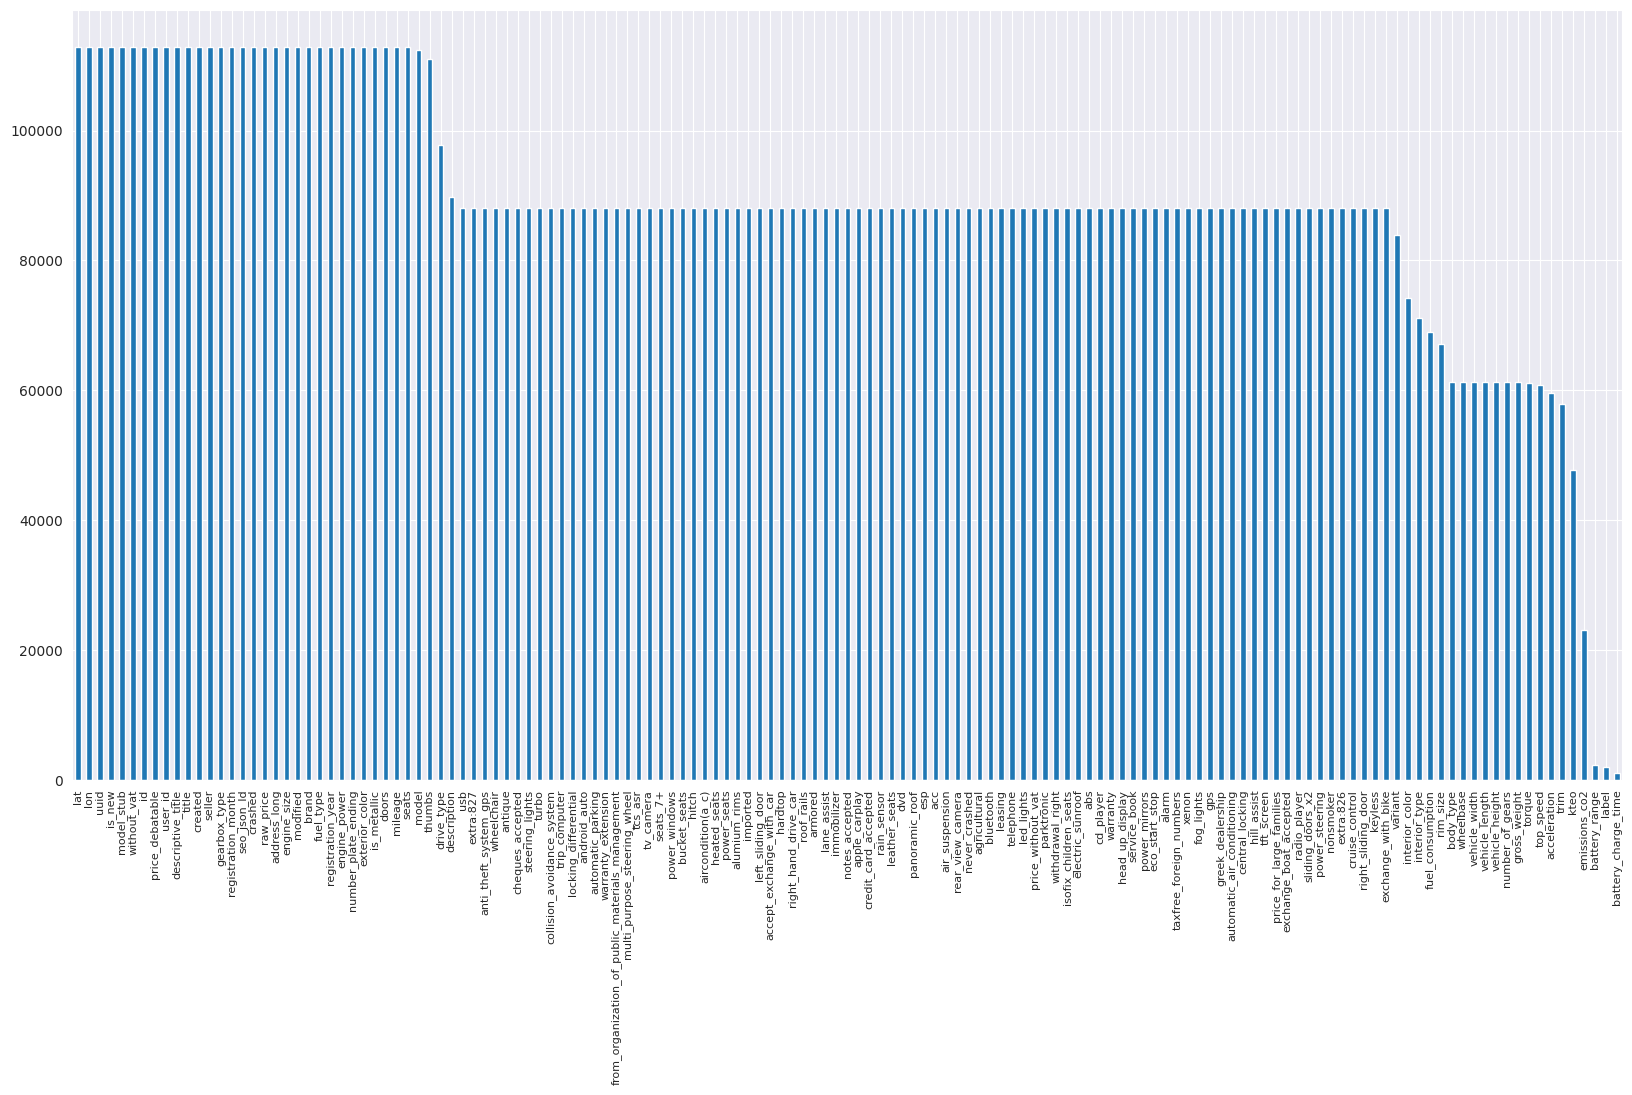

In [13]:
plt.figure(figsize = (20,10))
(~(dataset.isnull())).sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=8)
plt.savefig('../plots/completude.png',bbox_inches='tight')

In [17]:
dataset.columns.values

array(['lat', 'lon', 'uuid', 'is_new', 'label', 'model_stub', 'thumbs',
       'id', 'price_debatable', 'user_id', 'title', 'without_vat',
       'descriptive_title', 'seller', 'created', 'seo_json_ld', 'mileage',
       'crashed', 'address_long', 'raw_price', 'engine_size', 'modified',
       'registration_month', 'registration_year', 'battery_range',
       'engine_power', 'fuel_type', 'gearbox_type', 'brand', 'variant',
       'model', 'description', 'antique', 'cheques_accepted', 'turbo',
       'steering_lights', 'collision_avoidance_system', 'trip_computer',
       'wheelchair', 'apple_carplay', 'credit_card_accepted', 'extra:827',
       'leather_seats', 'anti_theft_system_gps', 'rain_sensor',
       'panoramic_roof', 'dvd', 'automatic_parking', 'warranty_extension',
       'from_organization_of_public_materials_management',
       'multi_purpose_steering_wheel', 'tcs_asr', 'tv_camera', 'seats_7+',
       'power_windows', 'bucket_seats', 'hitch', 'aircondition(a_c)',
       'hea

antique to esp

In [26]:
dataset.iloc[:,0].name

'lat'

In [3]:
idx_init = dataset.columns.get_loc('antique')
idx_end = dataset.columns.get_loc('esp')

for idx in range(idx_init, idx_end + 1):
    dataset.rename(columns={dataset.columns[idx] : 'extra_' + dataset.iloc[:,idx].name}, inplace=True)

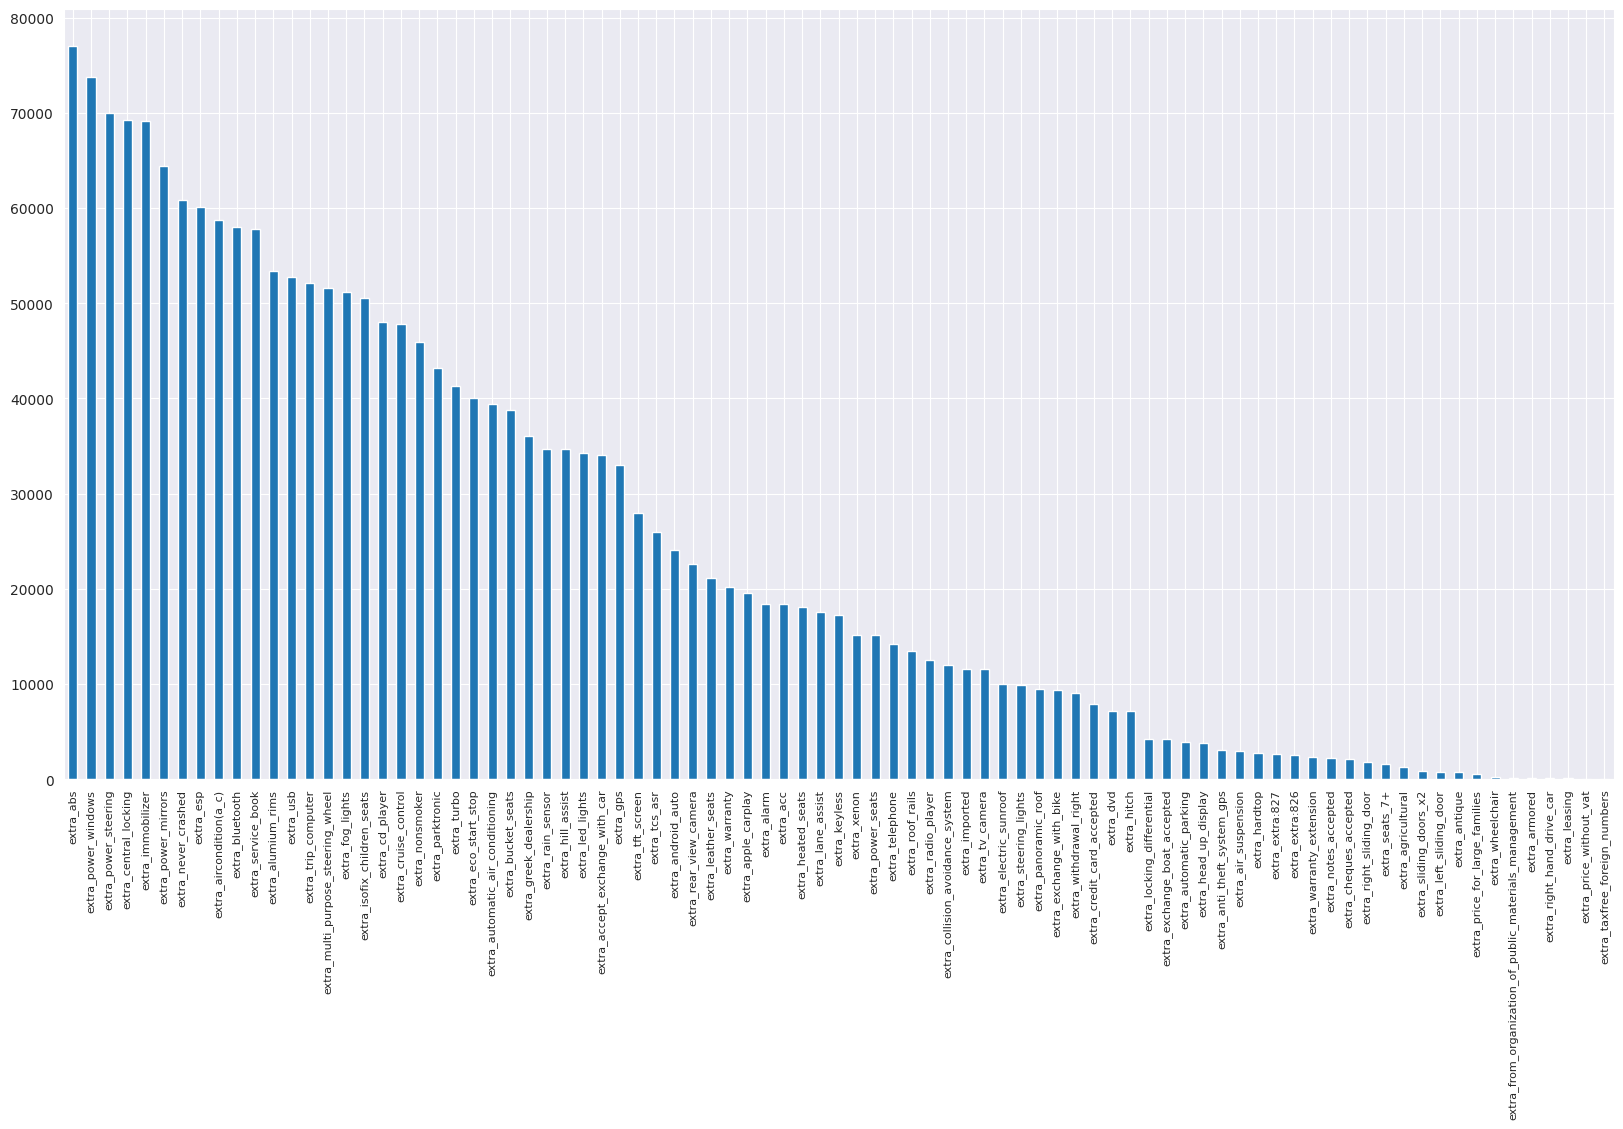

In [40]:
plt.figure(figsize = (20,10))
dataset.loc[:,dataset.columns.str.contains('extra')].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=8)
plt.savefig('../plots/extras.png',bbox_inches='tight')

In [4]:
dataset.loc[:,dataset.columns.str.contains('extra')] = dataset.loc[:,dataset.columns.str.contains('extra')].astype('boolean')

In [5]:
bool_cols = dataset.loc[:,dataset.columns.str.contains('extra')].columns.values

Let's focus on the extras

In [6]:
extra_df = dataset.loc[dataset.loc[:,bool_cols].notna().all(axis=1),dataset.columns.str.contains(r'extra|raw_price',regex=True)]

In [7]:
extra_df.shape

(88068, 86)

In [60]:
dataset_melted = extra_df.melt(id_vars=['raw_price'], value_vars=bool_cols, var_name='Boolean Column', value_name='Hue')

In [70]:
1523/4

380.75

In [76]:
for i in range(0,len(bool_cols),21):
    print(i)

0
21
42
63
84


In [6]:
bool_cols = list(bool_cols)

In [81]:
dataset.loc[:,bool_cols[0:3]+['raw_price']]

KeyError: "None of [Index(['extra_antiqueraw_price', 'extra_cheques_acceptedraw_price',\n       'extra_turboraw_price'],\n      dtype='object')] are in the [columns]"

In [97]:
dataset.loc[dataset.loc[:,bool_cols].notna().all(axis=1), bool_cols[0:22] + ['raw_price']]

,extra_antique,extra_cheques_accepted,extra_turbo,extra_steering_lights,extra_collision_avoidance_system,extra_trip_computer,extra_wheelchair,extra_apple_carplay,extra_credit_card_accepted,extra_extra:827,...,extra_panoramic_roof,extra_dvd,extra_automatic_parking,extra_warranty_extension,extra_from_organization_of_public_materials_management,extra_multi_purpose_steering_wheel,extra_tcs_asr,extra_tv_camera,extra_seats_7+,raw_price
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3500.0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5950.0
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,45000.0
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,19999.0
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113872,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,17490.0
113873,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,8690.0
113874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,10900.0
113875,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,106000.0


/tmp/ipykernel_2365376/2320760862.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=10,rotation=90)
/tmp/ipykernel_2365376/2320760862.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=10,rotation=90)
/tmp/ipykernel_2365376/2320760862.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=10,rotation=90)
/tmp/ipykernel_2365376/2320760862.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=10,rotation=90)
/tmp/ipykernel_2365376/2320760862.py

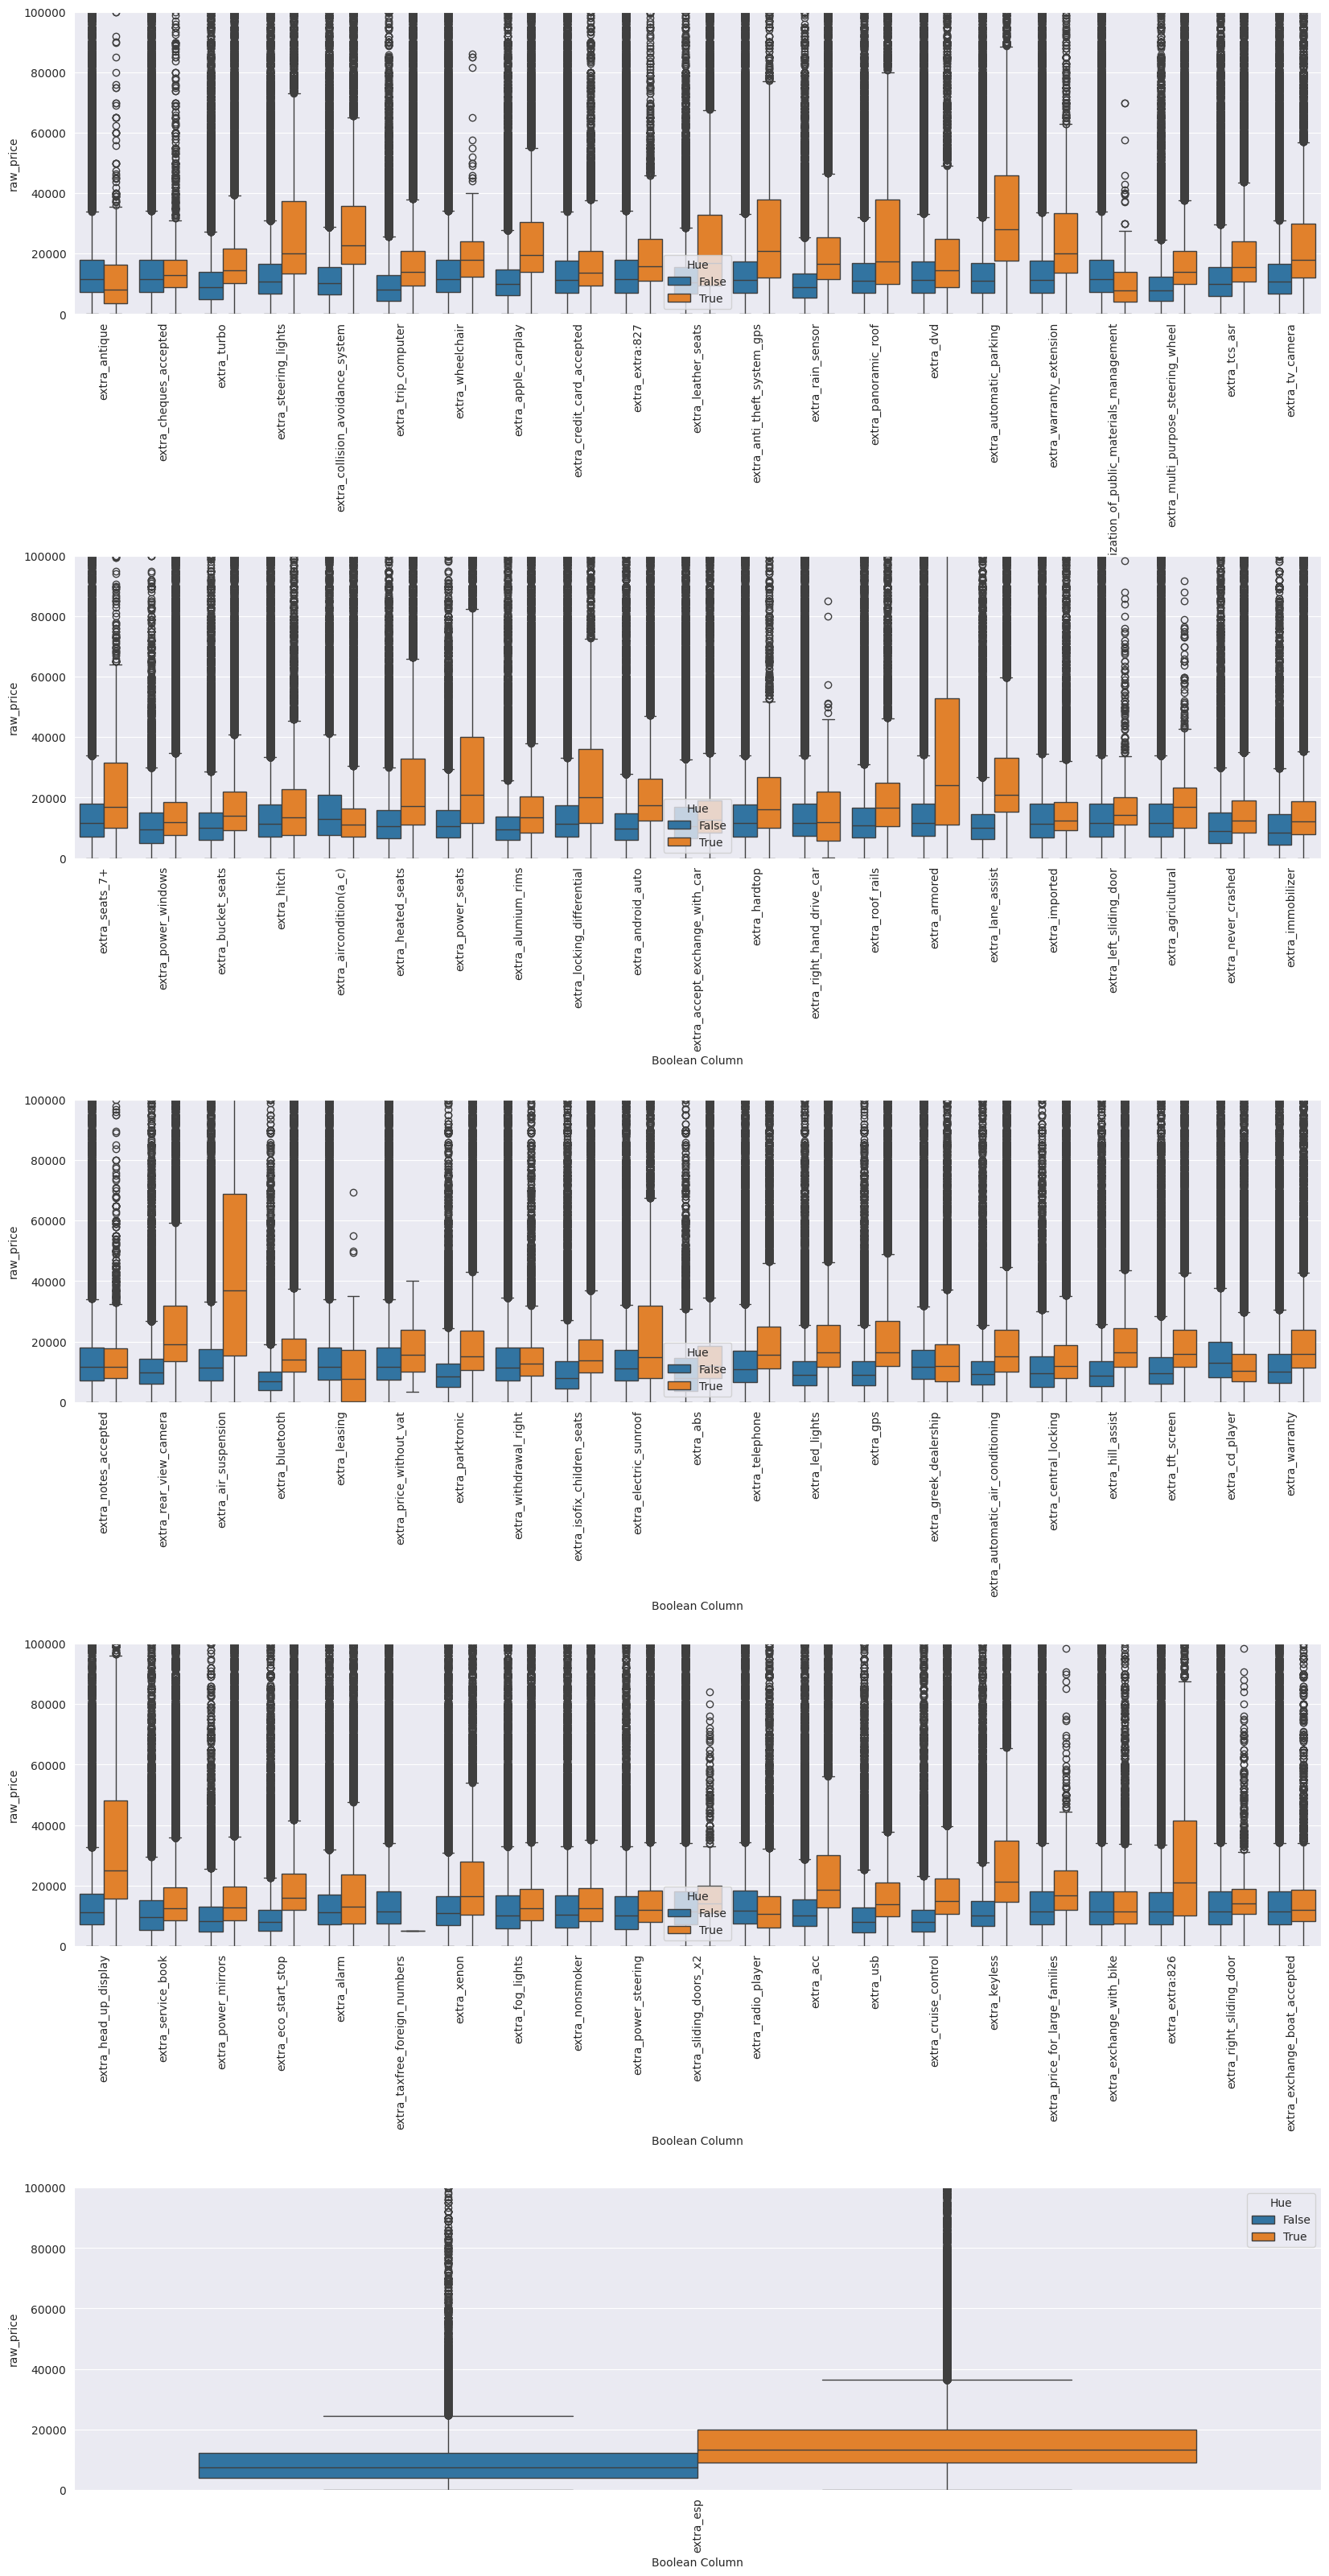

In [96]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (20,40))
for i,start in enumerate(range(0,len(bool_cols),21)):
    end = min(len(bool_cols),start+21)
    extra_df = dataset.loc[dataset.loc[:,bool_cols[start:end]].notna().all(axis=1),bool_cols[start:end] + ['raw_price']]
    dataset_melted = extra_df.melt(id_vars=['raw_price'], value_vars=bool_cols[start:end], var_name='Boolean Column', value_name='Hue')
    sns.boxplot(data=dataset_melted, y='raw_price', x='Boolean Column', hue='Hue',ax=ax[i])
    ax[i].set_ylim([0,100000])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=10,rotation=90)
    plt.subplots_adjust(hspace=0.8)

In [98]:
dataset.columns.values

array(['lat', 'lon', 'uuid', 'is_new', 'label', 'model_stub', 'thumbs',
       'id', 'price_debatable', 'user_id', 'title', 'without_vat',
       'descriptive_title', 'seller', 'created', 'seo_json_ld', 'mileage',
       'crashed', 'address_long', 'raw_price', 'engine_size', 'modified',
       'registration_month', 'registration_year', 'battery_range',
       'engine_power', 'fuel_type', 'gearbox_type', 'brand', 'variant',
       'model', 'description', 'extra_antique', 'extra_cheques_accepted',
       'extra_turbo', 'extra_steering_lights',
       'extra_collision_avoidance_system', 'extra_trip_computer',
       'extra_wheelchair', 'extra_apple_carplay',
       'extra_credit_card_accepted', 'extra_extra:827',
       'extra_leather_seats', 'extra_anti_theft_system_gps',
       'extra_rain_sensor', 'extra_panoramic_roof', 'extra_dvd',
       'extra_automatic_parking', 'extra_warranty_extension',
       'extra_from_organization_of_public_materials_management',
       'extra_multi_purpose

In [102]:
cols_without_extras = dataset.columns[~dataset.columns.str.contains('extra')].to_list()

In [103]:
cols_without_extras

['lat',
 'lon',
 'uuid',
 'is_new',
 'label',
 'model_stub',
 'thumbs',
 'id',
 'price_debatable',
 'user_id',
 'title',
 'without_vat',
 'descriptive_title',
 'seller',
 'created',
 'seo_json_ld',
 'mileage',
 'crashed',
 'address_long',
 'raw_price',
 'engine_size',
 'modified',
 'registration_month',
 'registration_year',
 'battery_range',
 'engine_power',
 'fuel_type',
 'gearbox_type',
 'brand',
 'variant',
 'model',
 'description',
 'interior_type',
 'seats',
 'kteo',
 'exterior_color',
 'number_plate_ending',
 'emissions_co2',
 'battery_charge_time',
 'interior_color',
 'rim_size',
 'vehicle_height',
 'number_of_gears',
 'torque',
 'gross_weight',
 'acceleration',
 'vehicle_width',
 'body_type',
 'vehicle_length',
 'top_speed',
 'trim',
 'wheelbase',
 'fuel_consumption',
 'drive_type',
 'doors',
 'is_metallic']

In [8]:
restriction = [#'lat',
 #'lon',
 #'uuid',
 'is_new',
 #'label',
 #'model_stub',
 #'thumbs',
 #'id',
 #'price_debatable',
 #'user_id',
 #'title',
 #'without_vat',
 #'descriptive_title',
 #'seller',
 #'created',
 #'seo_json_ld',
 'mileage',
 #'crashed',
 #'address_long',
 'raw_price',
 'engine_size',
 #'modified',
 #'registration_month',
 'registration_year',
 #'battery_range',
 'engine_power',
 'fuel_type',
 'gearbox_type',
 'brand',
 #'variant',
 'model',
 #'description',
 #'interior_type',
 #'seats',
 #'kteo',
 #'exterior_color',
 #'number_plate_ending',
 #'emissions_co2',
 #'battery_charge_time',
 #'interior_color',
 #'rim_size',
 #'vehicle_height',
 #'number_of_gears',
 #'torque',
 #'gross_weight',
 #'acceleration',
 #'vehicle_width',
 #'body_type',
 #'vehicle_length',
 #'top_speed',
 #'trim',
 #'wheelbase',
 #'fuel_consumption',
 #'drive_type',
 #'doors',
 #'is_metallic'
 ]

In [111]:
restricted_df = dataset.loc[:,restriction]

In [112]:
restricted_df.shape

(112944, 9)

In [118]:
restricted_df['log_raw_price'] = np.log(restricted_df['raw_price'])
restricted_df['log_mileage'] = np.log(restricted_df['mileage'] + 1e-10)

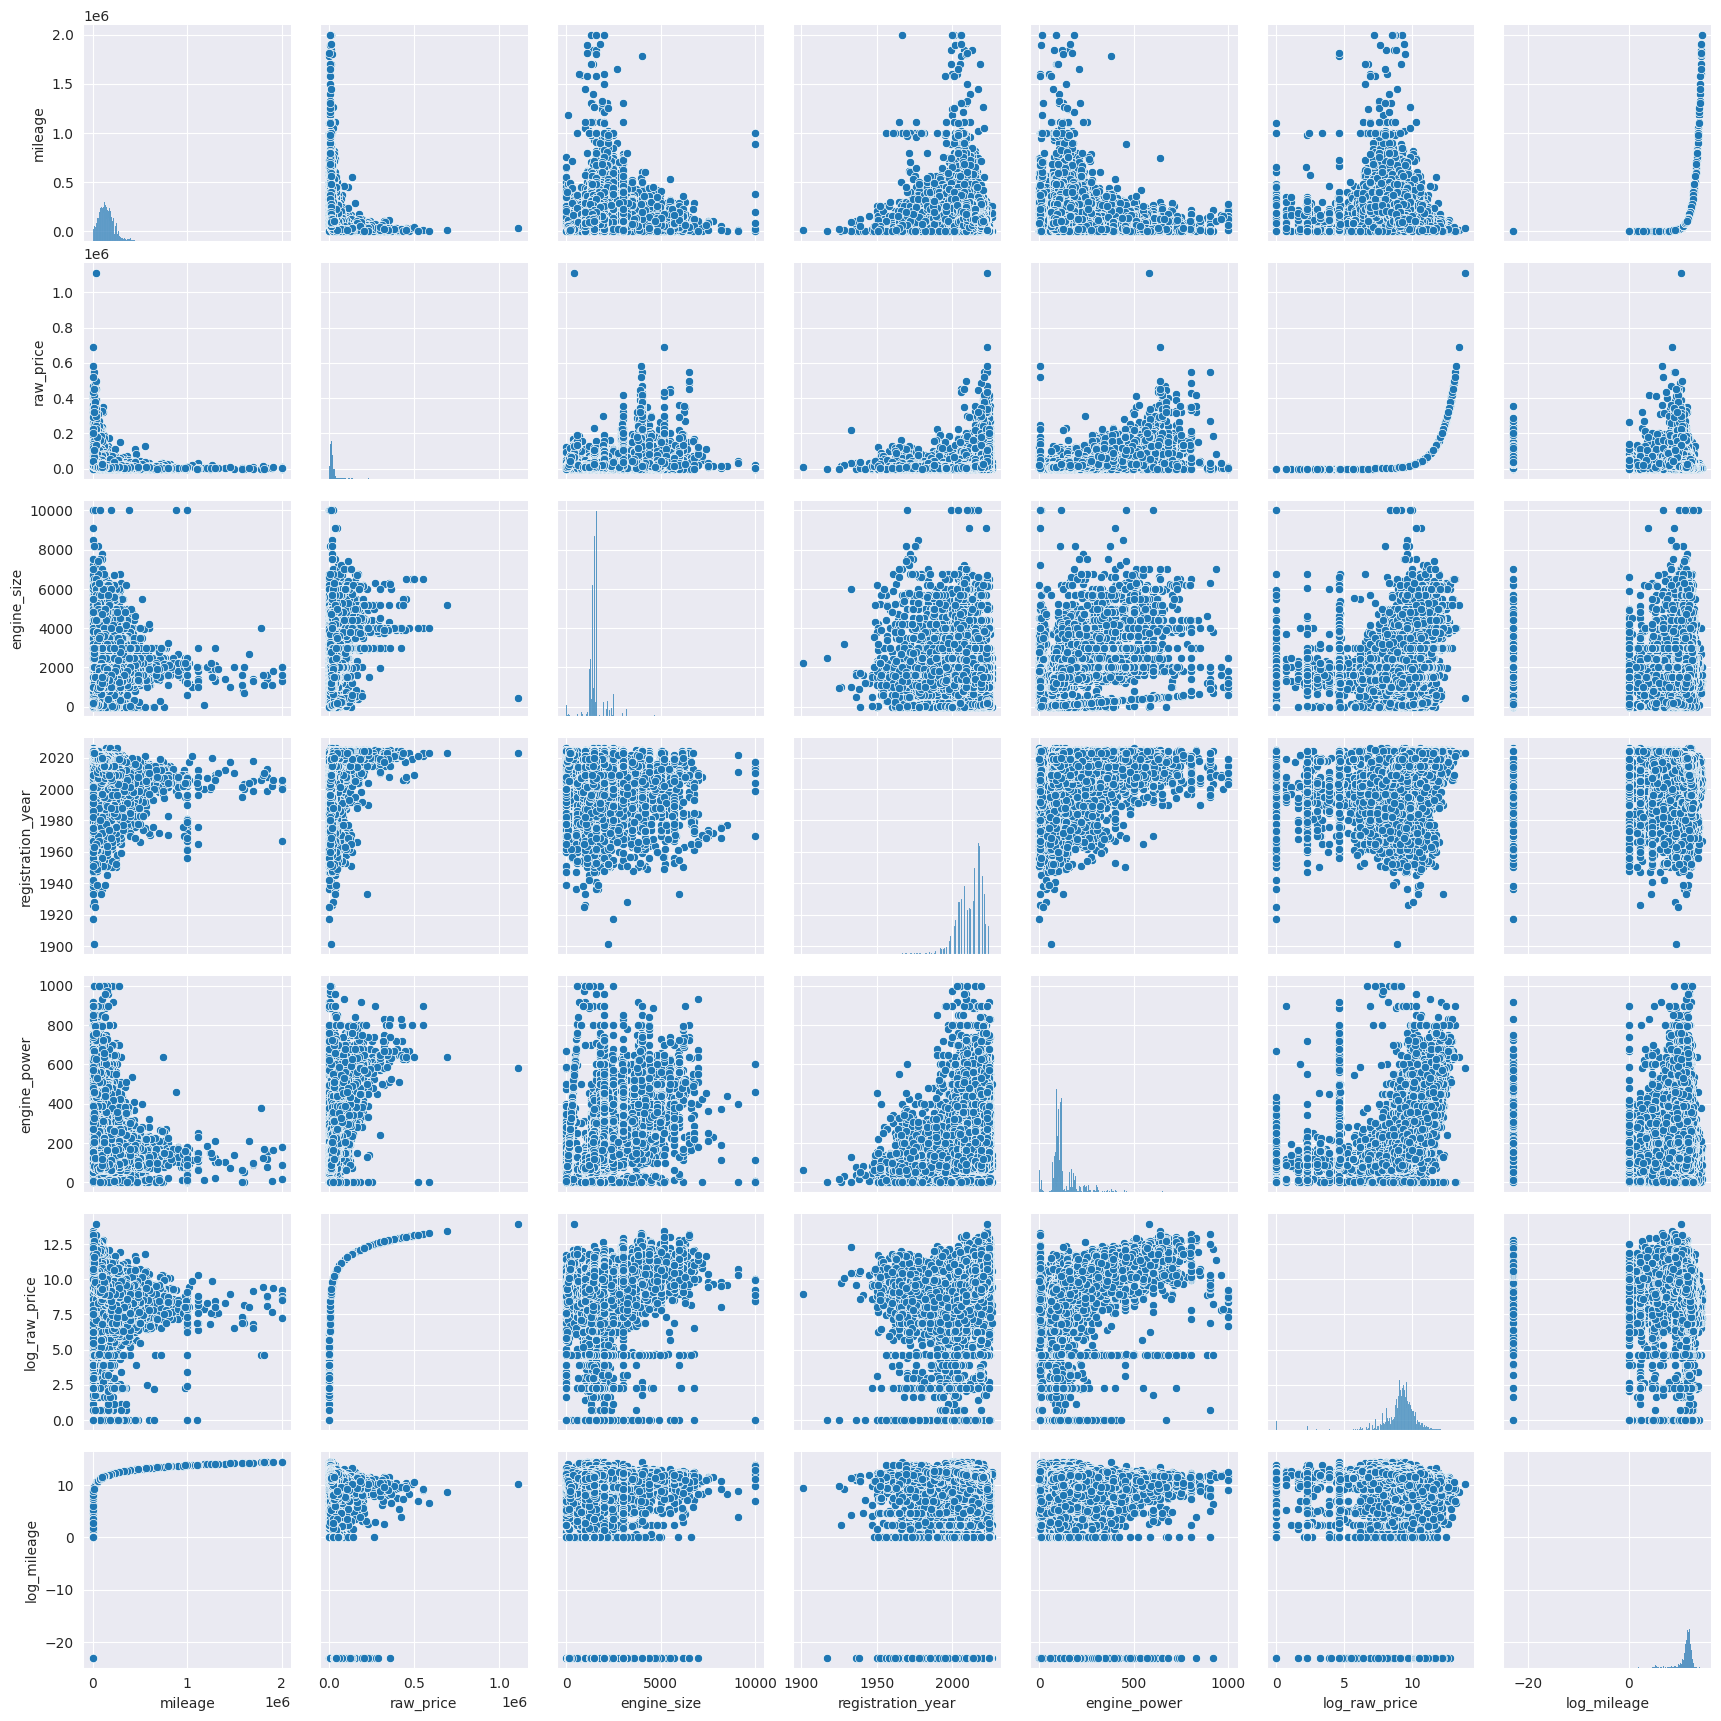

In [119]:
sns.pairplot(restricted_df)

We will restrict to a manufacturer

In [161]:
mercedes = dataset.loc[dataset.brand=='mercedes-benz',restriction].copy()

In [162]:
mercedes['log_raw_price'] = np.log(mercedes['raw_price'])
mercedes['log_mileage'] = np.log(mercedes['mileage'] + 1e-10)

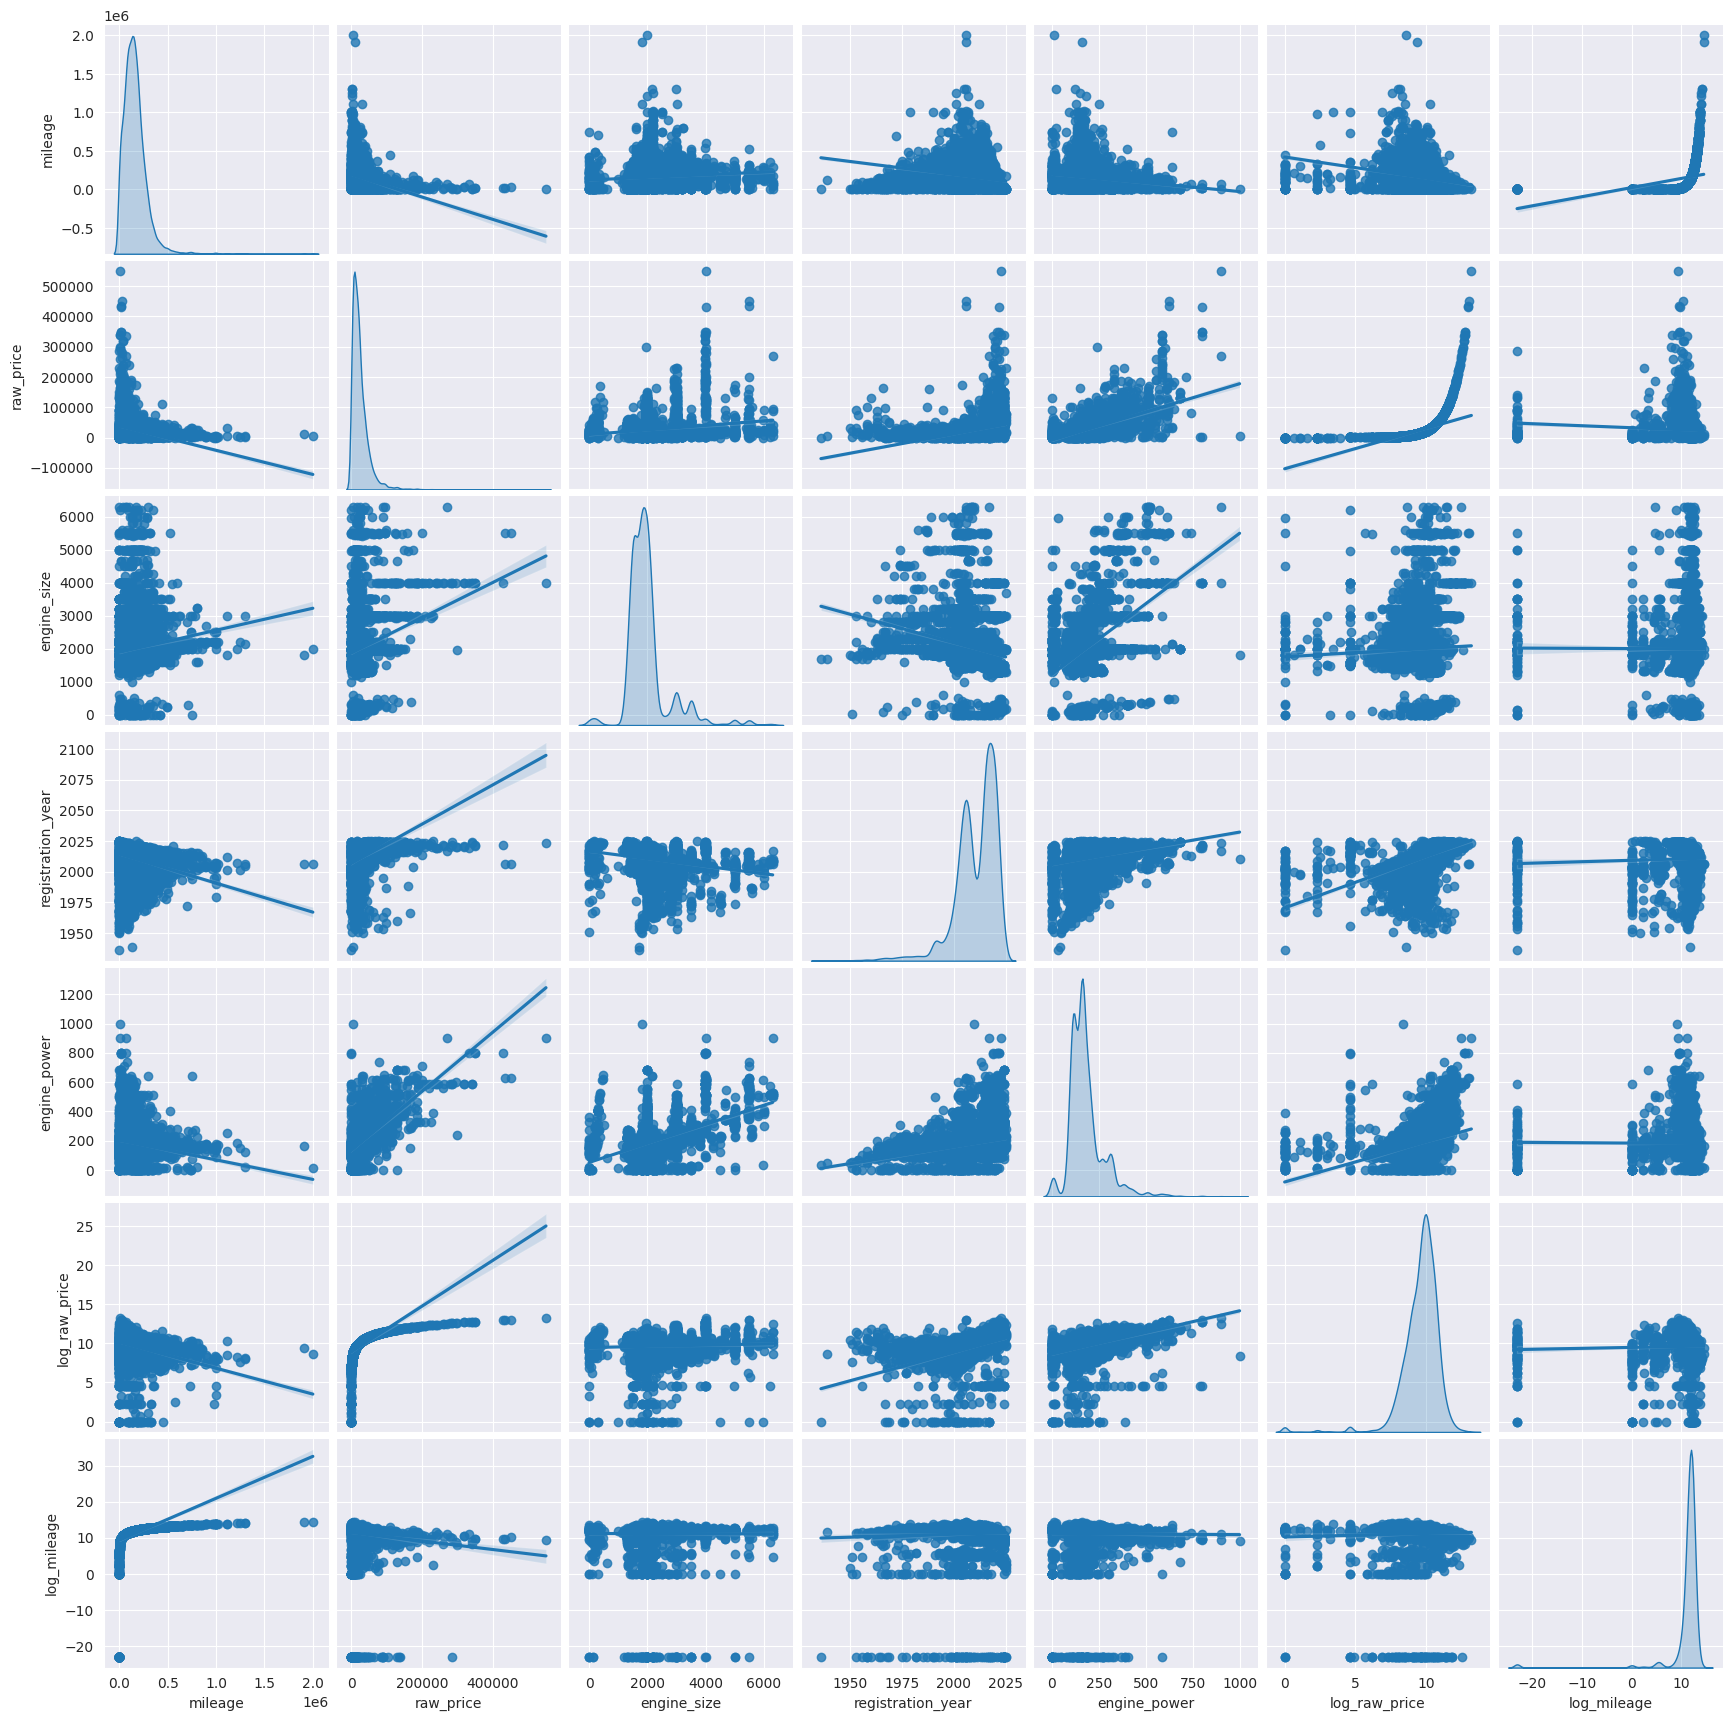

In [129]:
sns.pairplot(mercedes, kind='reg', diag_kind='kde')

<Axes: ylabel='Density'>

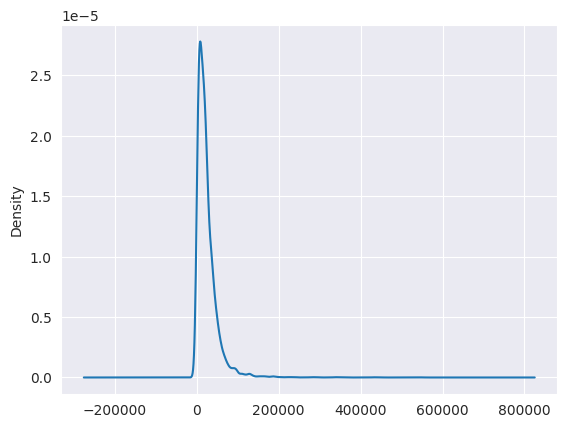

In [131]:
mercedes.raw_price.plot(kind='kde')

<Axes: ylabel='Density'>

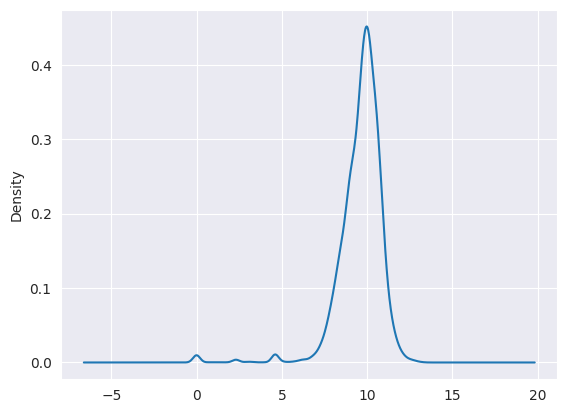

In [130]:
mercedes.log_raw_price.plot(kind='kde')

We see a bell curve when taking the log with a left tail this shows the presence of outliers

In [136]:
mercedes.raw_price.describe([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count      9604.000000
mean      25010.053207
std       27922.560023
min           1.000000
1%          100.000000
5%         2500.000000
10%        4000.000000
20%        7200.000000
30%       10500.000000
40%       14500.000000
50%       18490.000000
60%       22898.000000
70%       28000.000000
80%       36900.000000
90%       50000.000000
99%      129900.000000
max      550000.000000
Name: raw_price, dtype: float64

<Axes: ylabel='Density'>

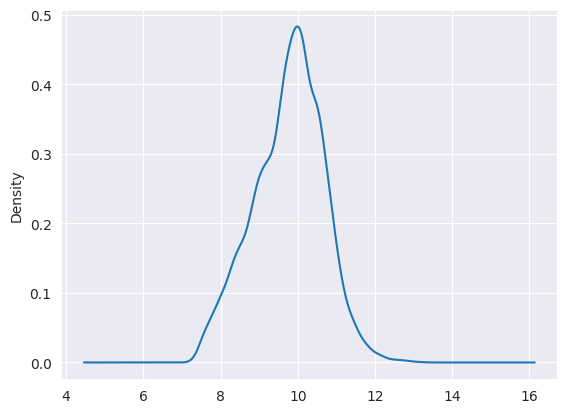

In [163]:
mercedes[(mercedes['raw_price'] > 1500)&(mercedes.is_new == False)]['log_raw_price'].plot(kind='kde')

In [147]:
mercedes[(mercedes['raw_price'] > 1500)&(mercedes.is_new==False)]['model'].unique()

array(['a 45 amg', 'e 220', 'glc 220', 'gla 180', 'a 180', 'v 220',
       'v 250', 's 350', 'slk 250', 'c 220', 'a 160', 'g 63 amg',
       'ml 250', 'c 180', 's 500', 'g 350', 'c 200', 's 300', 'vito',
       'e 200', 'b electric drive', 'gla 45amg', 'glc 250', 'gle 500',
       'gle 450amg', 'c 63 amg', 'sprinter', 'b 180', 'glc coupe',
       'c 300', 'e 300', 'gla 250', 'cla 200 shooting brake', 'glc 300',
       'a 250', 'gla 200', 'a 200', 'cla 180', 'c 43 amg', 'c 350',
       'amg gt', 'gle 350', 'g 500', 'gls 63', 'gle 300', 'eqb',
       'glc 350', 'e 180', 'cla 250', 'c 250', 'e 250', 'b 250', 'eqa',
       'eqv', 'gle 63amg', 'a 220', 'cla 45 amg', 'a 35 amg', 'eqc',
       'gle 450', 'c 400', 'x 350', 'gle 43 amg', 'cla 200', 'citan',
       'cla 35 amg', 'glb 200', 's 580', '180', 'b 160', 'glb 180',
       'glc 43 amg', 'gla 220', 'amg gt r', 'gle 53 amg', 'b 200',
       'cle 200', 'glc 200', nan, 'v 200', 'eqe', 'gls 600', 'maybach',
       'cls 350', 'cla 250 shootin

In [158]:
dataset.loc[dataset.is_new,'mileage'].describe()

count      1911.000000
mean        776.893773
std       13061.917055
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      330000.000000
Name: mileage, dtype: float64

In [164]:
nan_pct = dataset.isna().sum()/dataset.shape[0]

lat                 0.000000
lon                 0.000000
uuid                0.000000
is_new              0.000000
model_stub          0.000000
                      ...   
interior_color      0.343462
fuel_consumption    0.389582
drive_type          0.134651
doors               0.000053
is_metallic         0.000044
Length: 124, dtype: float64

In [205]:
dataset.registration_year.describe([0.01,0.05,0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.8,0.9])

count    112944.000000
mean       2011.540285
std           9.022560
min        1901.000000
1%         1977.000000
5%         1997.000000
10%        2001.000000
25%        2007.000000
30%        2008.000000
40%        2011.000000
50%        2014.000000
60%        2016.000000
75%        2018.000000
80%        2019.000000
90%        2020.000000
max        2026.000000
Name: registration_year, dtype: float64

In [212]:
dataset.brand.value_counts().sort_values(ascending=True)

brand
rolls royce         6
lynk&co             6
gmc                 7
china-motors        7
iveco               7
                 ... 
bmw              6872
peugeot          7049
volkswagen       7162
opel             7572
mercedes-benz    9214
Name: count, Length: 65, dtype: int64

We wish to create an estimator for used cars and we will therefore create some rules in order to remove data that are unnecessary for this task:
* Cars with is_new = True
* Ads without a price
* Ads without the model or brand of the car
* Cars selling for less than a certain value as there are some abnormalities
* Registration year > 1990
* No antiques
* Drop manufacturers for which we have less than 5 ads

In [207]:
dataset.head()

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,vehicle_width,body_type,vehicle_length,top_speed,trim,wheelbase,fuel_consumption,drive_type,doors,is_metallic
0,40.537681,22.991531,fb208079-b3a1-4187-abe1-c3532386445c,False,NaN,Kia Sportage '02 LIMIDET DERMA FULL EXTRA,"{'count': 7, 'urls': ['https://static.car.gr/1...",11709,True,3027523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,2.0,True
2,40.988597,24.636671,11833766-eca4-436f-8be0-f4f304e5946d,False,NaN,Mercedes-Benz C 180 '00 ELEGANS ΥΠΕΡΠΡΟΣΦΟΡΑ,"{'count': 15, 'urls': ['https://static.car.gr/...",34666,True,1001889,...,1427.0,sedan,4516.0,193.0,Classic,2690.0,9.2,RWD,5.0,True
3,40.271180,22.533929,a47702b9-4b30-47aa-8e0c-2bd1bdaa151d,False,NaN,Lincoln Town Car '07 STRECH LIMO TIFFANIS,"{'count': 5, 'urls': ['https://static.car.gr/6...",67361,True,3026787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RWD,4.0,False
4,41.093296,23.570392,b8976804-d099-490e-bbcb-d3a9b0971253,False,NaN,Porsche Boxster '02 TIPTRONIC,"{'count': 8, 'urls': ['https://static.car.gr/6...",69173,True,1002754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RWD,3.0,True
5,35.314652,25.174091,8e277417-81a2-43cf-898b-40c02603caf1,False,NaN,Rover 620 '95 TI,"{'count': 6, 'urls': ['https://static.car.gr/1...",116855,True,1006337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FWD,4.0,True


In [9]:
dataset = dataset[dataset.raw_price.notna() & dataset.model.notna()].copy().reset_index(drop=True)

In [7]:
dataset = dataset[dataset.registration_year> 1990].copy().reset_index(drop=True)

In [8]:
dataset = dataset[dataset.groupby('brand')['brand'].transform('count')>5].copy().reset_index(drop=True)

In [11]:
dataset.shape

(107926, 141)

Now we will restrict ourselves to a subset of features initially

In [9]:
restriction = [
 'mileage',
 'raw_price',
 'engine_size',
 'registration_year',
 'engine_power',
 'fuel_type',
 'gearbox_type',
 'brand',
 'model',
'exterior_color']

In [10]:
car_ads = dataset.loc[:,restriction].copy()

In [14]:
car_ads.shape

(107926, 10)

In [220]:
dataset.brand.unique()

array(['kia', 'mercedes-benz', 'porsche', 'rover', 'volkswagen', 'audi',
       'bmw', 'rolls royce', 'jeep', 'chrysler', 'alfa romeo', 'citroen',
       'toyota', 'opel', 'smart', 'daewoo', 'skoda', 'renault', 'volvo',
       'seat', 'peugeot', 'saab', 'suzuki', 'nissan', 'daihatsu', 'gmc',
       'mitsubishi', 'chevrolet', 'dodge', 'mazda', 'fiat',
       'china-motors', 'lexus', 'maserati', 'subaru', 'ford', 'bentley',
       'lada', 'jaguar', 'corvette', 'honda', 'dacia', 'hyundai',
       'ssangyong', 'land rover', 'mg', 'lotus', 'lancia', 'mini',
       'ferrari', 'lamborghini', 'isuzu', 'cadillac', 'aston martin',
       'hummer', 'infiniti', 'ecocar', 'tesla', 'abarth', 'mclaren', 'ds',
       'cupra', 'lynk&co', 'iveco', 'piaggio'], dtype=object)

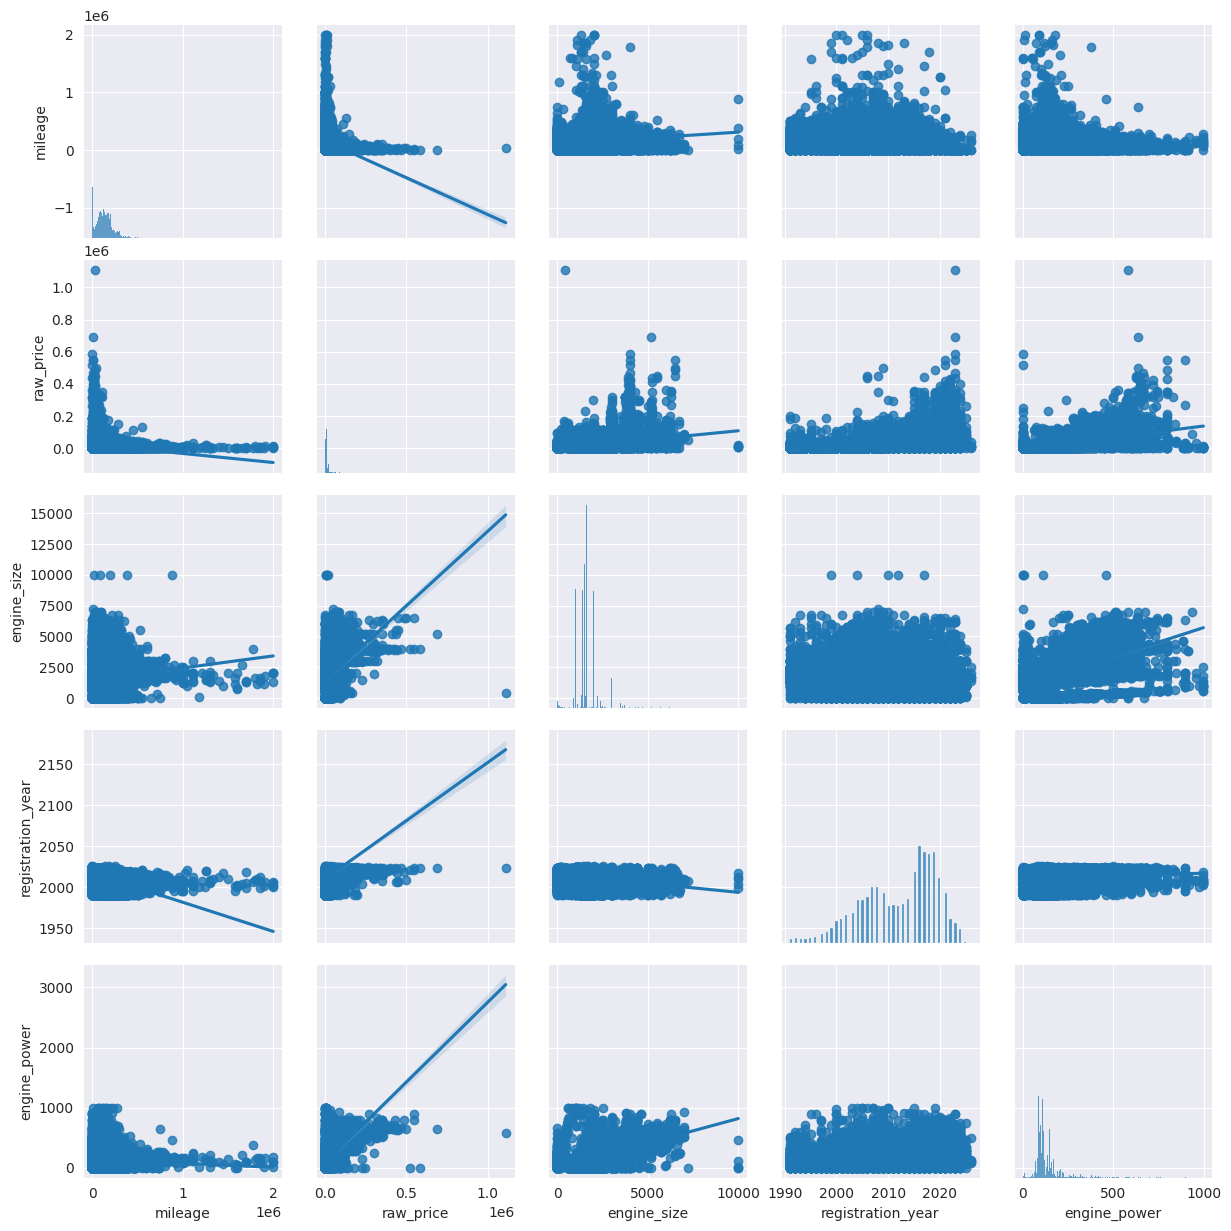

In [221]:
sns.pairplot(car_ads, kind='reg')

In [11]:
car_ads = car_ads[car_ads.mileage.notna()].copy().reset_index(drop=True)

Treatment of the extras:

On the figure below we have a bar plot of the percentage of True values in the dataset for each extra.

We can see that there are some options which are very common accross all cars such as abs, electrical windows, central locking. These extras being found on all cars we expect that they shouldn't influence the price of a car heavily as they must be found on all models. (at least recent models)

On the other hand we find some extras which are almost always set to False, price without vat, leasing, foreign number plates. These extras are field that aren't really considered as the extras adding value to the price of a car. We expect that their effect on the price of a car will not be as important as the other extras.

Never crashed is redundant with the columns is crashed.

Then we get the extras in between

We expect that

<Axes: >

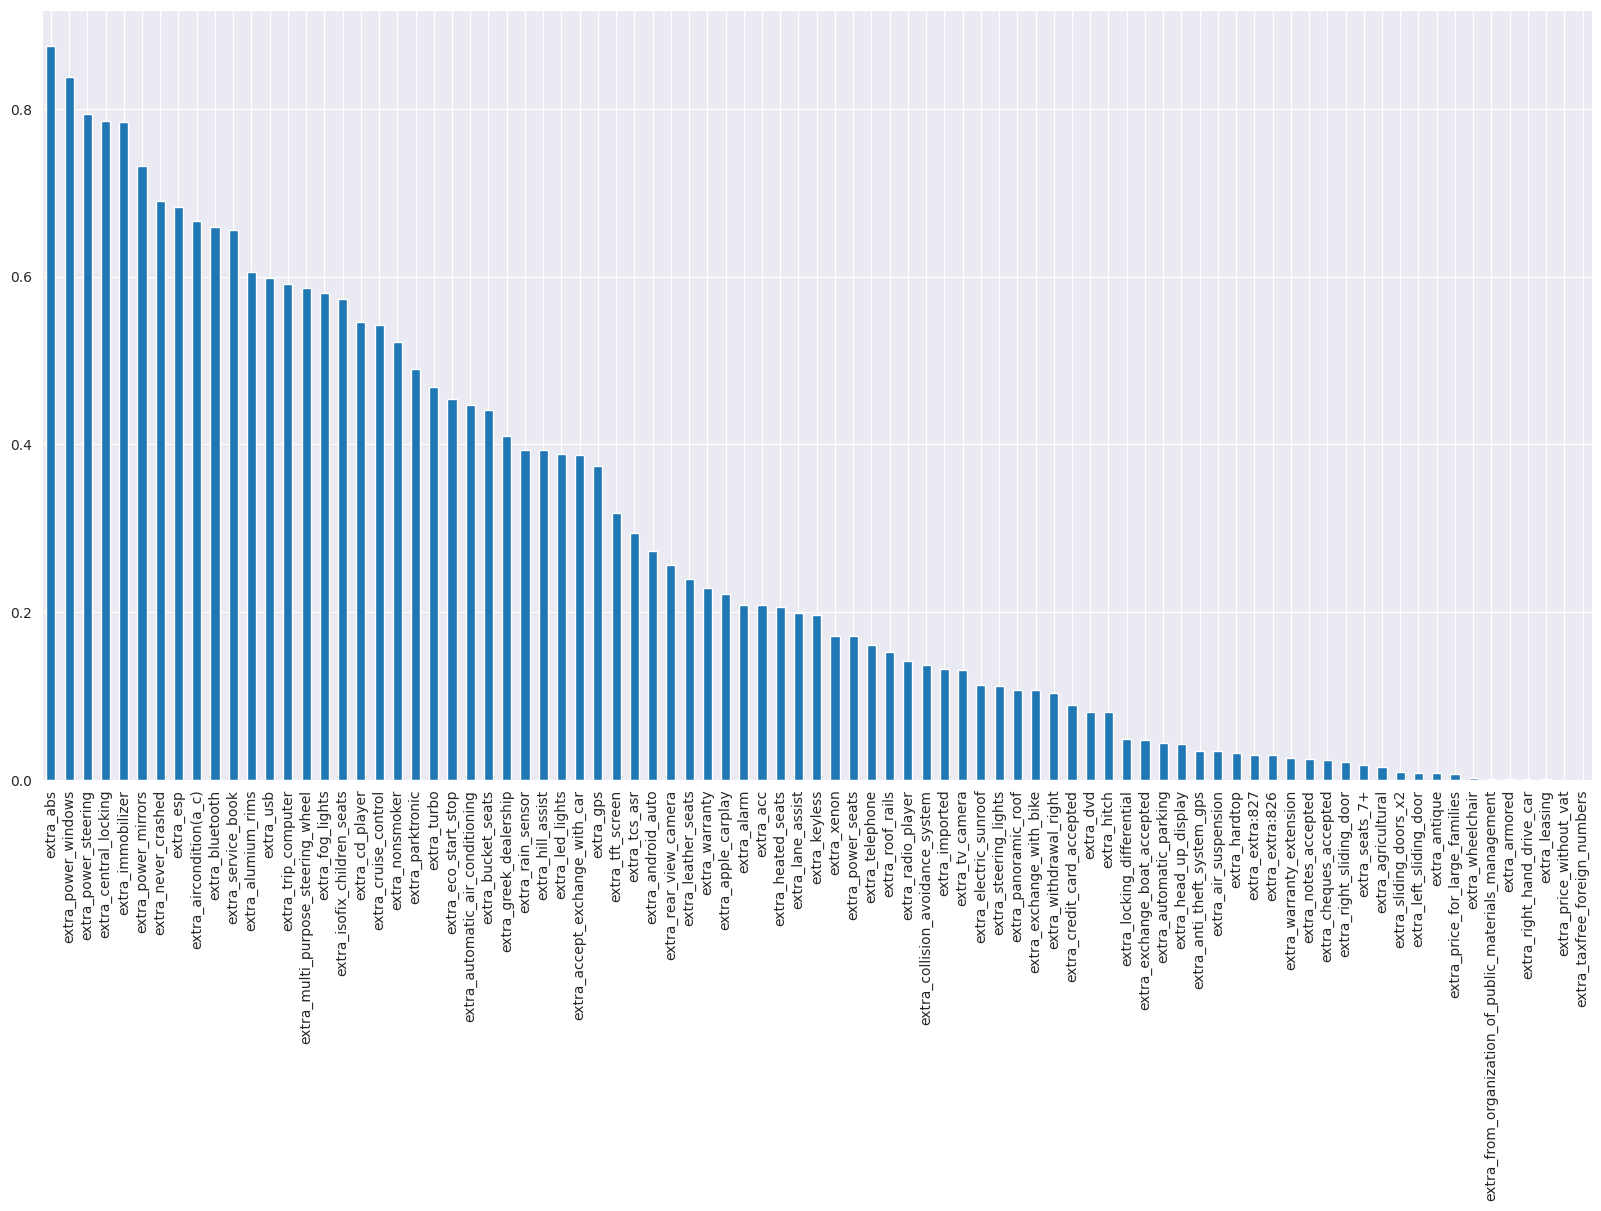

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
dataset.loc[:,dataset.columns.str.contains('extra')].mean().sort_values(ascending=False).plot(kind='bar',ax=ax)

<Axes: xlabel='brand'>

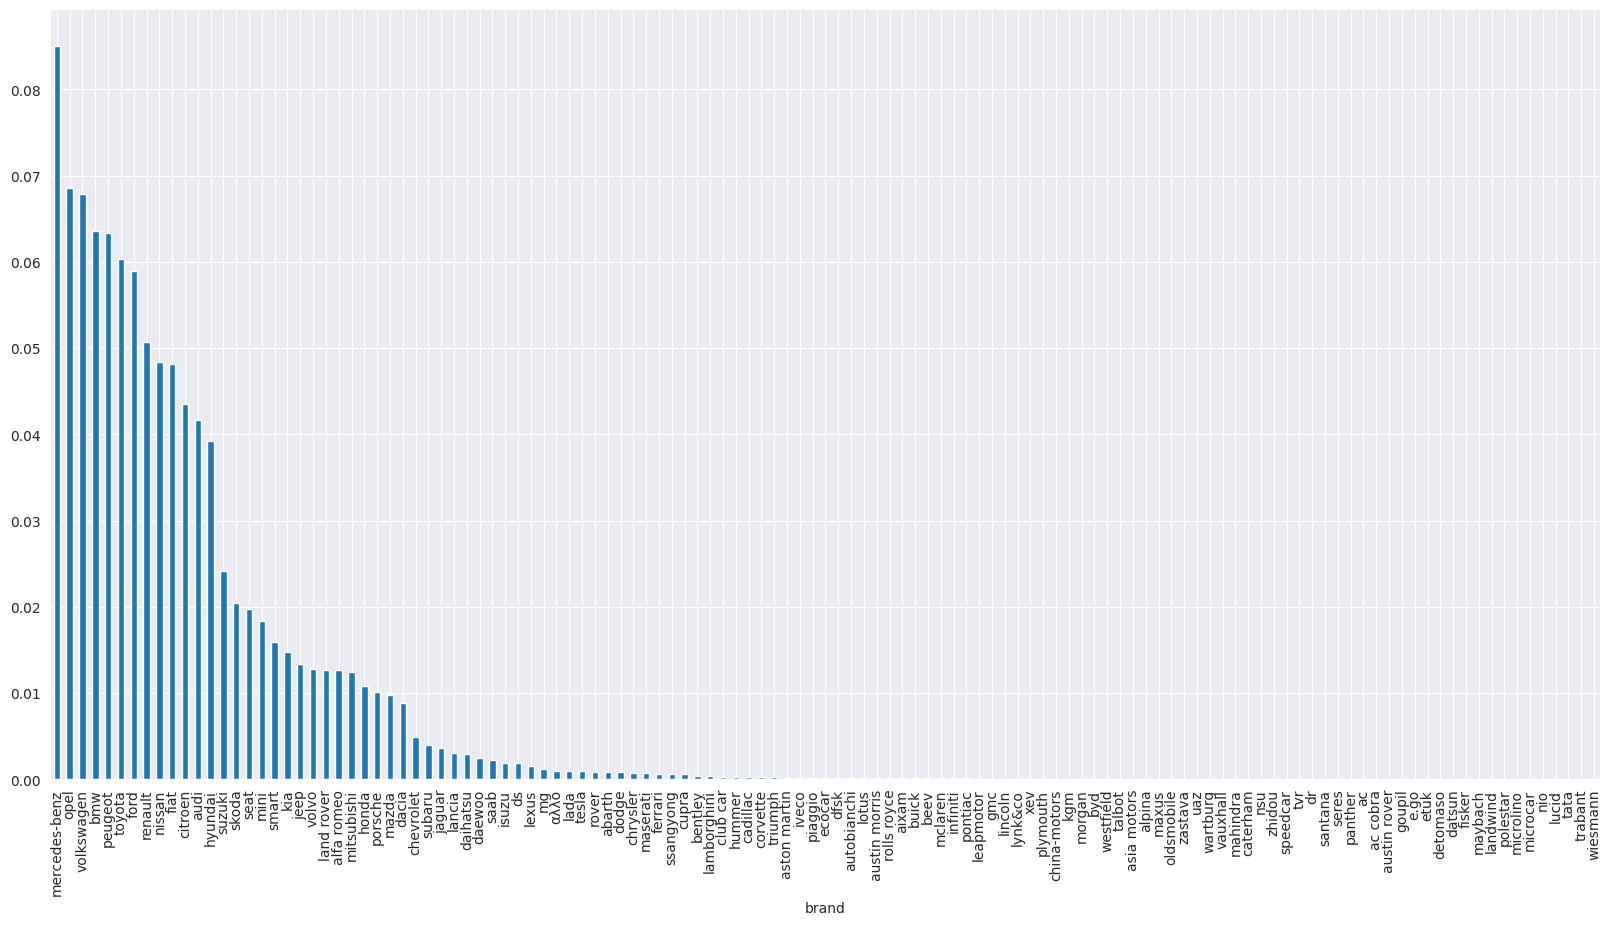

In [57]:
plt.figure(figsize=(20,10))
dataset.groupby('brand')['brand'].agg(lambda x: x.count()/dataset.shape[0]).sort_values(ascending=False).plot(kind='bar')

In [80]:
dataset.dropna(subset=['model'], inplace=True)

In [82]:
dataset = dataset.loc[(dataset.groupby('brand')['brand'].transform(lambda x: x.count()>10))].copy()

In [85]:
dataset.shape

(112268, 141)

In [101]:
dataset= dataset[dataset.registration_year > 2000].copy()

In [104]:
dataset.shape

(102634, 141)

In [105]:
dataset.loc[(dataset.groupby('model')['model'].transform(lambda x: x.count()<5)),['brand','model']].drop_duplicates()

,brand,model
16,rolls royce,phantom
30,daewoo,musso
101,chevrolet,silverado
134,mercedes-benz,slr
227,ford,streetka
...,...,...
112055,mini,one clubman
112839,bmw,315
113054,bmw,z3 m
113290,bmw,m440


In [ ]:
dataset[dataset.brand.isin(dataset.brand.groupby(by=['brand'])['brand'].count())].shape

model
116               715
x1                619
320               566
x5                489
x3                468
                 ... 
activehybrid 7      1
123                 1
315                 1
z3 m                1
m850                1
Name: count, Length: 127, dtype: int64